# Data Preparation: Decomposition

With time series we decompose the series into 4 constituent parts to understand the data better.

- level (describes the average value of the series)
- trend (is the change in the series between two adjacent periods, this is an optional component, not necessarily present in all series)
- seasonality (describes a short term cyclic behavior over time, this is also an optional component, not necessarily present in all series)
- noise (The random variation that can not be explained by the model, present in all series to some extent)


Level, trend, and seasonality are further categorized as the systematic components as they characterize the underlying data with consistent patterns and can be modeled, whereas noise is a non-systematic component as it has a random variation which cannot be modeled directly. Through decomposition we will break time series into these individual components to understand the data better and choose the right forecasting approach.

- Additive decomposition
- Multiplicative decomposition

There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.



## Import libraries

In [ ]:
 pip install git+https://github.com/statsmodels/statsmodels.git

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
plt.style.use("seaborn-whitegrid")

## Load data

In [2]:
# example data
url = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
df = pd.read_csv(url, parse_dates=["date"], index_col="date")
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


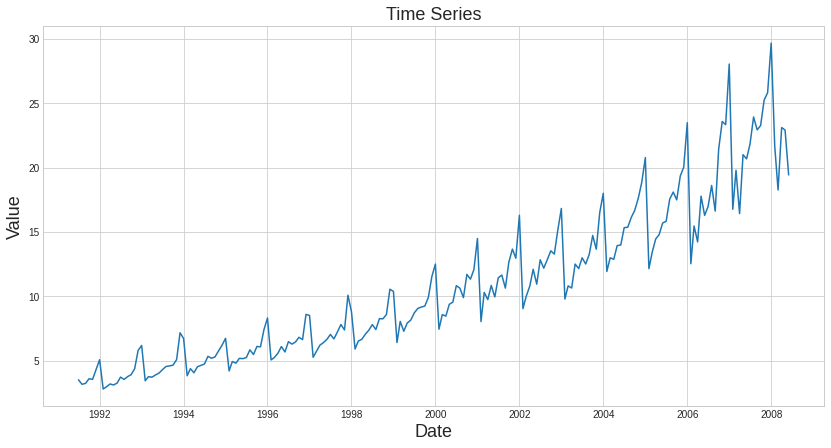

In [3]:
# plot data
plt.figure(figsize=(14,7))
plt.plot(df.index, df.loc[:, "value"])
plt.title("Time Series", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.show()

## Decomposition Plot Function (Naive / Classical)

In [4]:
# plot decomposition
def plot_decomposition(decomposition, axes, title=""):
  axes[0].set_title(title, fontsize=14)
  decomposition.observed.plot(ax=axes[0], legend=False)
  axes[0].set_ylabel('Observed')
  decomposition.trend.plot(ax=axes[1], legend=False)
  axes[1].set_ylabel('Trend')
  decomposition.seasonal.plot(ax=axes[2], legend=False)
  axes[2].set_ylabel('Seasonal')
  decomposition.resid.plot(ax=axes[3], legend=False)
  axes[3].set_ylabel('Residual')
  plt.show()

## Additive Decomposition (Naive / Classical)

An additive model suggests that the components are added together as follows:

`y(t) = Level + Trend + Seasonality + Noise` 

An additive model is linear where changes over time are consistently made by the same amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

In [5]:
# additive decomposition
addi_decomp = seasonal_decompose(df["value"], model="additive", extrapolate_trend="freq")

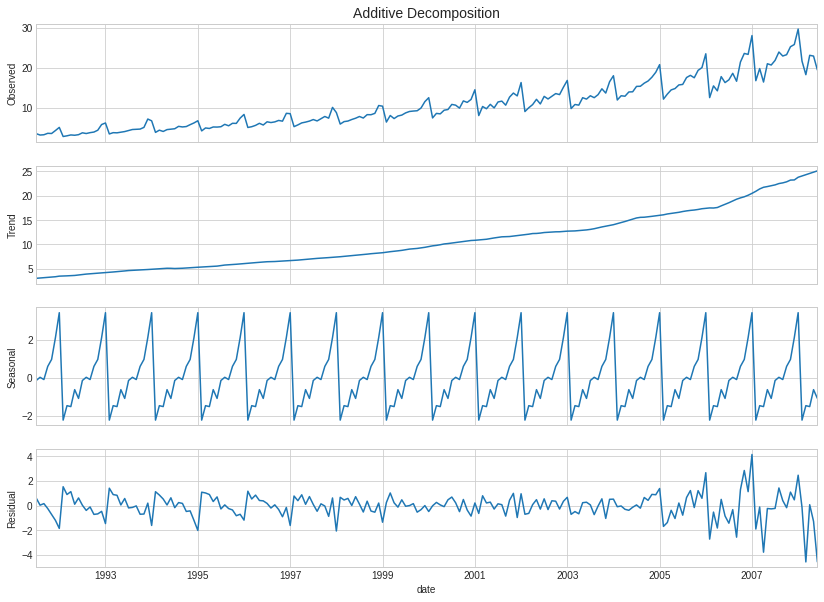

In [6]:
# plot additive decomposition
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(14,10))
plot_decomposition(addi_decomp, axes, "Additive Decomposition")

## Multiplicative Decomposition (Naive / Classical)

A multiplicative model suggests that the components are multiplied together as follows:

`y(t) = Level * Trend * Seasonality * Noise` 

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line. A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

In [7]:
# multiplicative decomposition
multi_decomp = seasonal_decompose(df["value"], model="multiplicative", extrapolate_trend="freq")

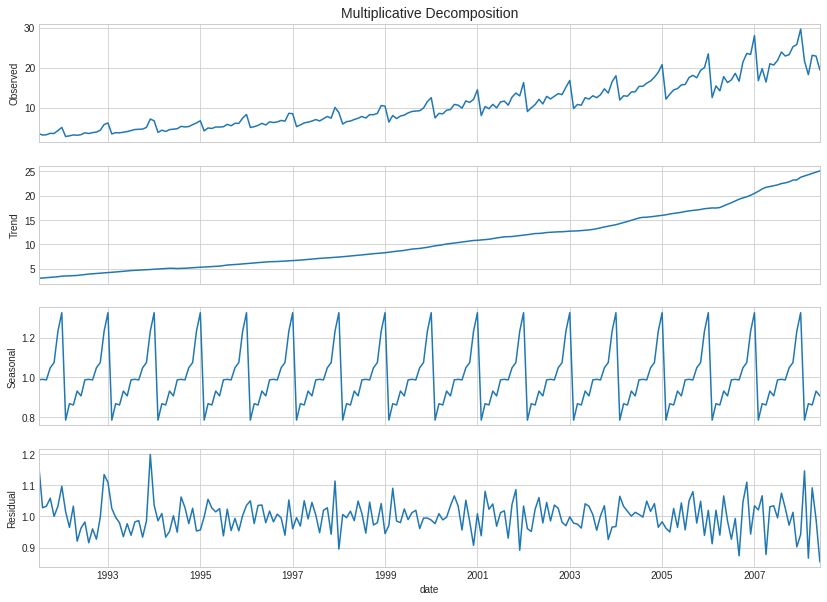

In [8]:
# plot multiplicative decomposition
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(14,10))
plot_decomposition(multi_decomp, axes, "Multiplicative Decomposition")

## Seasonal-Trend Decomposition using LOESS (STL)

https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html

LOESS: locally estimated scatterplot smoothing

STL uses LOESS (locally estimated scatterplot smoothing) to extract smooths estimates of the three components. The key inputs into STL are:

- season - The length of the seasonal smoother. Must be odd.
- trend - The length of the trend smoother, usually around 150% of season. Must be odd and larger than season.
- low_pass - The length of the low-pass estimation window, usually the smallest odd number larger than the periodicity of the data.